# ¿Qué son los algoritmos de Clustering?

Los algoritmos de clustering, también conocidas como agrupamiento o segmentación tienen como principal función, encontrar una estructura o un patrón en una colección de datos no clasificados. Esto significa que intentan encontrar grupos en los datos que compartan atributos en común 🧐

## Cluster Jerárquicos - Tipos

**Jerárquicos aglomerativos (bottom-up)**
Inicialmente cada instancia es un clúster. Las estrategias aglomerativas, parten de un conjunto de elementos individuales y van “juntando” los elementos que más se parezcan hasta quedarse con un número de clusters que se considere óptimo.

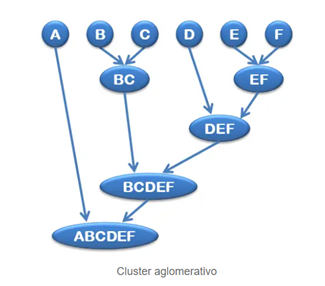


**Jerárquicos divisivos (top-down)** 
Inicialmente todas las instancias están en un solo clúster y luego se van dividiendo, tal cual su nombre lo indica. Las estrategias divisivas, parten del conjunto de elementos completos y se van separando en grupos diferentes entre sí, hasta quedarse con un número de clusters que se considere óptimo.

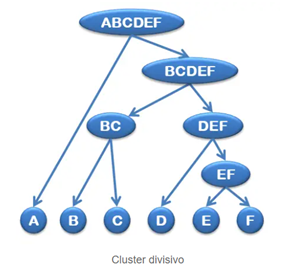

**Clúster No Jerárquico**
Volviendo a este tipo de algoritmo, la cantidad de clústeres óptima se define de antemano, y los registros se asignan a los clústeres según su cercanía. Existen múltiples algoritmos de Tipo No Jerárquico, como ser por ejemplo: K – Means o HDBSCAN. 

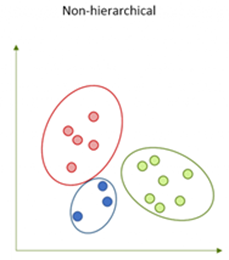

**Otros tipos de Clustering**

También existen varios tipos más específicos de clústeres. Por ejemplo overlapping o fuzzy, donde los registros pueden pertenecer a varios clusters simultáneamente; o los probabilísticos, que usan una distribución de probabilidad para asignar la membresía al clúster.

# K - Means 

El objetivo de este algoritmo es encontrar grupos en los datos, con el número de grupos representados por la variable K. El algoritmo funciona de manera iterativa para asignar cada punto de datos a uno de los grupos K en función de las características que se proporcionan. 

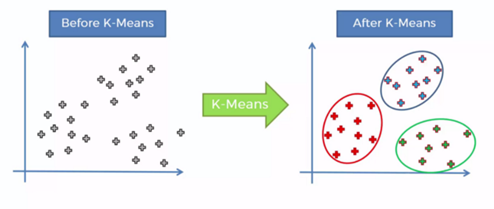

**El problema del K - Means**:

Puede pasar a veces que si no se escalan/normalizan los datos, no anda nada bien porque asume que los datos son “esféricos”. Como solución se suele utilizar algoritmos de clustering basado en densidades, como el HDBSCAN.

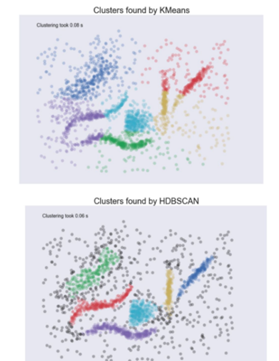


Pero antes de explicar el algoritmo de HDBSCAN, veamos un ejemplo de aplicación en Python 🤓 

In [15]:
# K-Means Clustering

# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Carga del conjunto de datos
dataset = pd.read_csv("C:/Users/Layla/Desktop/Docencia/BA Emprende/Programa Inteligencia Artificial/7. Clase/Datasets/Mall_Customers.csv", sep = ",")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
#Generamos nuestra x
X = dataset.iloc[:, [3, 4]].values

Nos quedamos con las variables 3 y 4 de conjunto de datos, las cuales corresponden al ingreso anual en miles y la puntuación del cliente.

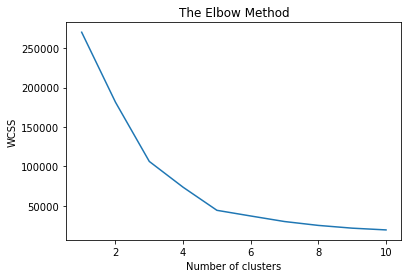

In [17]:
# Metodo del Codo para encontrar el numero optimo de clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Link de Interés: https://es.wikipedia.org/wiki/K-medias

En el bloque anterior, generamos los clusters para valores de 1 a 10 (en el rango de 1 a 11) y obtenemos para cada uno de ellos, la suma de las distancias con el tributo inertia_ del objeto kmeans. En la gráfica observamos que la disminución en la suma de las distancias se atenúa cuando el número de clusters es igual a 5, por lo que, para este caso práctico, el número óptimo de clusters será de 5.



In [18]:
# Creando el k-Means para los 5 grupos encontrados
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) #k-means++ acelera la convergencia, respecto de random
y_kmeans = kmeans.fit_predict(X)

Para poder observar gráficamente la asignación de los 200 clientes a 5 grupos o clusters realizamos lo siguiente, le asignamos un color a cada grupo y marcamos los centroides en amarillo:

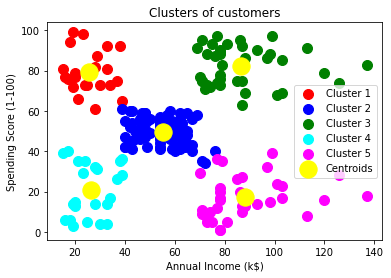

In [19]:
# Visualizacion grafica de los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# HDBSCAN

HDBSCAN es un algoritmo de clúster o agrupamiento basado en la densidad que puede ser utilizado para identificar clústeres de cualquier forma en un conjunto de datos que contiene ruido y valores atípicos. La idea básica detrás del enfoque de agrupamiento basado en la densidad se deriva de un método intuitivo de agrupamiento humano. 

Por ejemplo, al mirar la figura, uno puede identificar fácilmente tres grupos junto con varios puntos de ruido, debido a las diferencias en la densidad de puntos.

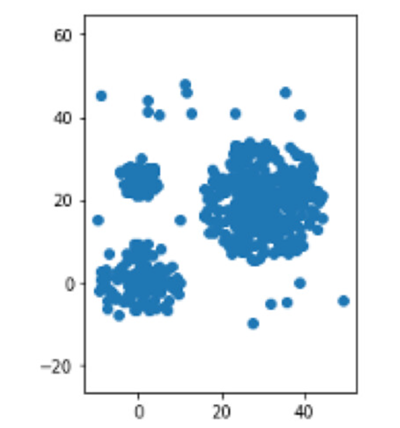

Por lo tanto, los clústeres son regiones densas en el espacio de datos, separadas por regiones de menor densidad de puntos. El algoritmo HDBSCAN se basa en esta noción intuitiva de clústeres y ruido. 

In [20]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from hdbscan import HDBSCAN

#https://anaconda.org/conda-forge/hdbscan

In [21]:
#Cargamos el dataframe
df_cluster_hdbscan = np.load('C:/Users/Layla/Desktop/Docencia/BA Emprende/Programa Inteligencia Artificial/7. Clase/Datasets/clusterable_data.npy')

In [22]:
#Instanciamos el algoritmo
hdbscan = HDBSCAN(min_cluster_size=20,
                 min_samples=10)
                 
#Entrenamos y predecimos
preds = hdbscan.fit_predict(df_cluster_hdbscan)

In [23]:
#Convertimos en dataframe para poder graficar!
df_cluster_hdbscan = pd.DataFrame(df_cluster_hdbscan)
df_cluster_hdbscan.head()

,0,1
0,-0.121535,-0.228763
1,-0.220937,-0.252511
2,0.125904,-0.273143
3,-0.164537,-0.222244
4,-0.180824,-0.211075


In [24]:
#Renombramos las columnas!
df_cluster_hdbscan = df_cluster_hdbscan.rename(columns={0:'x',
                                                       1:'y'})
df_cluster_hdbscan.columns

Index(['x', 'y'], dtype='object')

<AxesSubplot:xlabel='x', ylabel='y'>

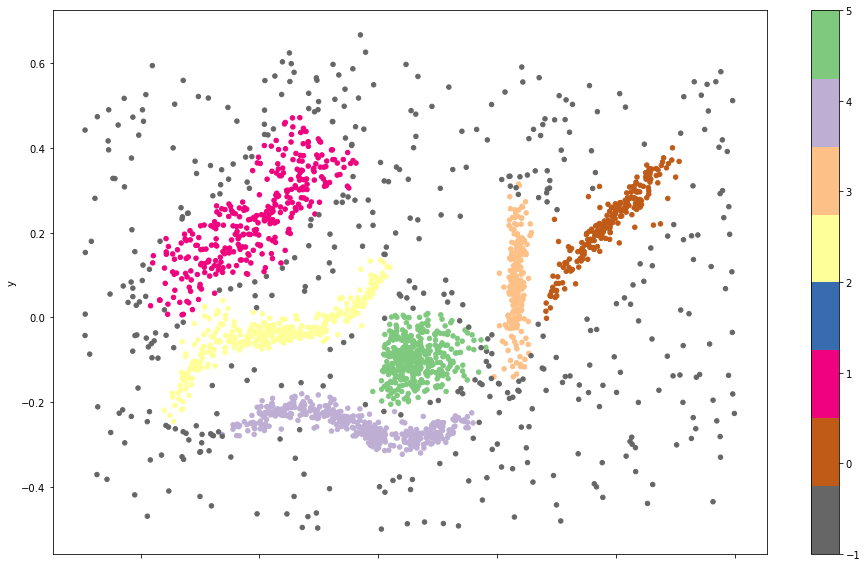

In [25]:
#Graficamos
df_cluster_hdbscan.plot(kind='scatter', x='x', y='y', c=preds, cmap='Accent_r', figsize=(16,10))

# Apreciaciones!

En base a la visualización anterior, nuestro algoritmo nos ha creado seis clusters y nos ha detectado el ruido del dataset (puntos grises).

# Actividad Grupal

La presente actividad, busca que los alumnos puedan indagar sobre los usos y aplicaciones de otros algoritmos de Clustering.

**Consignas**: 
1. Investigar sobre diferentes algoritmos de Clustering.
2. Documentar un breve resumen del análisis realizado, detallando usos y características de los algoritmos.
3. Debatir colaborativamente entre todo. 

Herramienta sugerida: Padlet